## Binary Classifier

### Should note that boundaries in graphs can be off since it is approximate

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class Perceptron():
    
    def __init__(self, num_class=2, dim=2, max_iter=1000):
        
        # Check for appropriate classes and dimension
        assert num_class >= 2, "number of classes should be 2 or more"
        assert dim >= 1, "dimension should be 1 or more"
        
        self.num_class = num_class
        self.dim = dim
        self.max_iter = max_iter
        self._init_weights()
        
    def _init_weights(self):
        
        # if classes >= 3, each class has its own weights vector
        self.weights = np.zeros((1, self.dim))[0]
            
    def fit(self, x, y):
        
        assert x.shape[1] == self.dim, "number of features does not match {} != {}".format(x.shape[1], self.dim)
        assert len(x) == len(y), "x and y should have same length"
        
        for i in range(self.max_iter):
            
            for x1, y1 in zip(x, y):
                changed = self._train(x1, y1)

            if not changed:
                print('Finished training at iteration {}'.format(i+1))
                return

    def _train(self, x, y):
        
        # Binary classifier
        pred = 1 if np.dot(self.weights, x) >= 0 else -1

        if pred != y:
            self.weights += x*y
            return True

        return False
            
    def predict(self, x):
        
        if type(x) == list:
            x = np.array([x])

        assert x.shape[1] == self.dim, "number of features does not match {} != {}".format(x.shape[1], self.dim)
        
        pred = np.array([])

        for x1 in x:
            res = np.dot(self.weights, x1)
            pred = np.append(pred, 1 if res >= 0 else -1)
                
        return pred
    
    # Can ignore this part
    def __repr__(self):
        frmt = "Number of Labels : {}\n".format(self.num_class)
        frmt += "Feature Dimension : {}\n".format(self.dim)
        frmt += "Weight : {}".format(self.weights)
        
        return frmt


In [20]:
p = Perceptron()
p

Number of Labels : 2
Feature Dimension : 2
Weight : [0. 0.]

In [21]:
pos = [np.random.normal(1.5, 0.5, 30), np.random.normal(1.5, 0.5, 30)]
neg = [np.random.normal(-1.5, 0.5, 30), np.random.normal(-1.5, 0.5, 30)]

neg_y = np.array([-1]*30)
pos_y = np.ones(30)

![](tttt.png)

In [22]:
X = np.append(pos, neg, axis=1).transpose()
y = np.append(pos_y, neg_y)

p.fit(X, y)

Finished training at iteration 1


In [23]:
s = -p.weights[1] / p.weights[0]
b_x = np.linspace(-5, 5, 100)
b_y = b_x * s

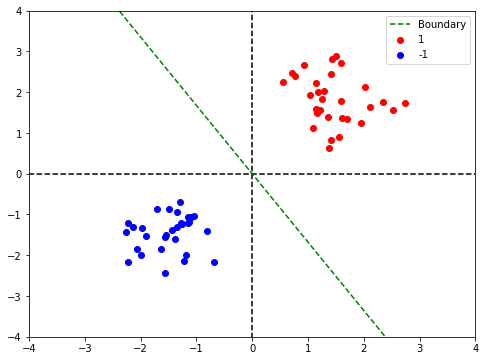

In [24]:
plt.figure(figsize=(8,6))

plt.plot(b_x, b_y, label="Boundary", linestyle='--', c='g')
plt.scatter(pos[0], pos[1], c='r', label='1')
plt.scatter(neg[0], neg[1], c='b', label='-1')
plt.hlines(0, xmin=-5, xmax=5, linestyles='--')
plt.vlines(0, ymin=-5, ymax=5, linestyles='--')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.legend();

In [25]:
class Perceptron():
    
    def __init__(self, num_class=2, dim=2, max_iter=1000, lr=1.0):
        
        # Check for appropriate classes and dimension
        assert num_class >= 2, "number of classes should be 2 or more"
        assert dim >= 1, "dimension should be 1 or more"
        assert type(lr) == float or type(lr) == int, "learning rate should be numeric value"
        assert lr > 0, "learning rate should be positive"
        
        self.num_class = num_class
        self.dim = dim
        self.max_iter = max_iter
        self.lr = lr
        self._init_weights()
        
    def _init_weights(self):

        # if classes >= 3, each class has its own weights vector
        if self.num_class == 2:
            self.weights = np.zeros((1, self.dim+1))[0]
        else:
            self.weights = np.zeros((self.num_class, self.dim+1))
            
    def fit(self, x, y):
        
        assert x.shape[1] == self.dim, "number of features does not match {} != {}".format(x.shape[1], self.dim)
        assert len(x) == len(y), "x and y should have same length"
        
        x = np.append(x, np.ones((len(x), 1)), axis=1)

        for i in range(self.max_iter):
            
            changed = self._train(x, y)
        
            if not changed:
                print('Finished training at iteration {}'.format(i+1))
                return

    def _train(self, x, y):

        if self.num_class == 2:
            # Binary classifier
            
            changed = False
            prev = self.weights
            
            for x1, y1 in zip(x, y):
                pred = 1 if np.dot(self.weights, x1) >= 0 else -1

                if pred != y1:
                    self.weights += self.lr*x1*y1
                    changed = True
            
            return changed
        
        else:
            # multi-class classifier
            changed = False
            for x1, y1 in zip(x, y):
                pred = np.argmax(np.dot(self.weights, x1))
                if pred != y1:
                    self.weights[int(y1)] += self.lr*x1
                    self.weights[pred] -= self.lr*x1

                    changed = True
                else:
                    changed = False
            return changed
            
    def predict(self, x):
        
        if type(x) == list:
            x = np.array([x])
            
        assert x.shape[1] == self.dim, "number of features does not match {} != {}".format(x.shape[1], self.dim)
        
        x = np.append(x, np.ones((len(x), 1)), axis=1)
        
        pred = np.array([])
        
        for x1 in x:
            res = np.dot(self.weights, x1)
            if self.num_class == 2:
                pred = np.append(pred, 1 if res >= 0 else -1)
            else:
                pred = np.append(pred, np.argmax(res))
                
        return pred
    
    # Can ignore this part
    def __repr__(self):
        frmt = "Number of Labels : {}\n".format(self.num_class)
        frmt += "Feature Dimension : {}\n".format(self.dim)
        frmt += "Learning Rate : {}\n".format(self.lr)
        frmt += "Weight : {}".format(self.weights)
        
        return frmt

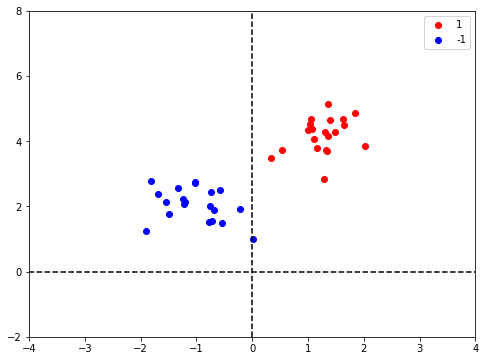

In [31]:
size = 20

pos = [np.random.normal(1.2, 0.5, size), np.random.normal(4, 0.5, size)]
neg = [np.random.normal(-1, 0.5, size), np.random.normal(2, 0.5, size)]

neg_y = -np.ones(size)
pos_y = np.ones(size)

X = np.append(pos, neg, axis=1).transpose()
y = np.append(pos_y, neg_y)

plt.figure(figsize=(8,6))
plt.scatter(pos[0], pos[1], c='r', label='1')
plt.scatter(neg[0], neg[1], c='b', label='-1')
plt.hlines(0, xmin=-5, xmax=5, linestyles='--')
plt.vlines(0, ymin=-2, ymax=8, linestyles='--')

plt.xlim(-4, 4)
plt.ylim(-2, 8)
plt.legend();

In [32]:
p.fit(X, y)

Finished training at iteration 1


In [33]:
pred = p.predict(X)
np.all(pred == y)

True

## Multi-class Classifier 

In [34]:
class Perceptron():
    
    def __init__(self, num_class=2, dim=2, max_iter=1000, lr=1.0):
        
        # Check for appropriate classes and dimension
        assert num_class >= 2, "number of classes should be 2 or more"
        assert dim >= 1, "dimension should be 1 or more"
        assert type(lr) == float or type(lr) == int, "learning rate should be numeric value"
        assert lr > 0, "learning rate should be positive"
        
        self.num_class = num_class
        self.dim = dim
        self.max_iter = max_iter
        self.lr = lr
        self._init_weights()
        
    def _init_weights(self):

        # if classes >= 3, each class has its own weights vector
        if self.num_class == 2:
            self.weights = np.zeros((1, self.dim+1))[0]
        else:
            self.weights = np.zeros((self.num_class, self.dim+1))
            
    def fit(self, x, y):
        
        assert x.shape[1] == self.dim, "number of features does not match {} != {}".format(x.shape[0], self.dim)
        assert x.shape[0] == len(y), "x and y should have same length"
        
        x = np.append(x, np.ones((len(x), 1)), axis=1)

        for i in range(self.max_iter):
            
            changed = self._train(x, y)

            if not changed:
                print('Finished training at iteration {}'.format(i+1))
                return

    def _train(self, x, y):
        
        changed = False
        
        for x1, y1 in zip(x, y):
            
            if self.num_class == 2:
                
                pred = 1 if np.dot(self.weights, x1) >= 0 else -1
                
                if pred != y1:
                    self.weights += self.lr*x1*y1
                    changed = True
                    
            else:
                
                pred = np.argmax(np.dot(self.weights, x1))
                
                if pred != y1:
                    self.weights[int(y1)] += self.lr*x1
                    self.weights[pred] -= self.lr*x1
                    
                    changed =  True
                    
        return changed
            
    def predict(self, x):
        
        if type(x) == list:
            x = np.array([x])
            
            
        assert x.shape[1] == self.dim, "number of features does not match {} != {}".format(x.shape[1], self.dim)
        
        x = np.append(x, np.ones((len(x), 1)), axis=1)
        
        pred = np.array([])
        
        for x1 in x:
            res = np.dot(self.weights, x1)
            if self.num_class == 2:
                pred = np.append(pred, 1 if res >= 0 else -1)
            else:
                pred = np.append(pred, np.argmax(res))
                
        return pred
    
    # Can ignore this part
    def __repr__(self):
        frmt = "Number of Labels : {}\n".format(self.num_class)
        frmt += "Feature Dimension : {}\n".format(self.dim)
        frmt += "Learning Rate : {}\n".format(self.lr)
        frmt += "Weight : {}".format(self.weights)
        
        return frmt

In [35]:
class1 = [np.random.normal(0, 0.5, size), np.random.normal(8, 0.5, size)]
class2 = [np.random.normal(-2, 0.5, size), np.random.normal(4, 0.5, size)]
class3 = [np.random.normal(2, 0.5, size), np.random.normal(4, 0.5, size)]

y1 = np.zeros((size, 1))
y2 = np.ones((size, 1))
y3 = np.ones((size, 1)) * 2

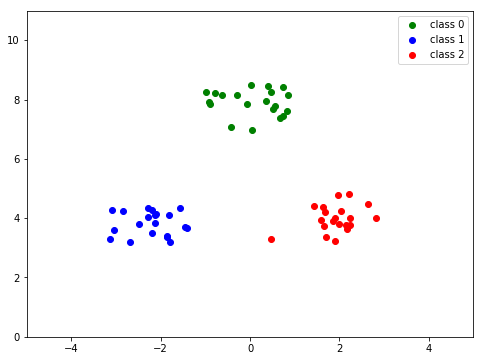

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(class1[0], class1[1], label='class 0', c='g')
plt.scatter(class2[0], class2[1], label='class 1', c='b')
plt.scatter(class3[0], class3[1], label='class 2', c='r')

plt.xlim(-5, 5)
plt.ylim(0, 11)

plt.legend();

In [37]:
X = np.append(class1, np.append(class2, class3, axis=1), axis=1).transpose()
y = np.append(y1, np.append(y2, y3))

In [39]:
p = Perceptron(num_class=3)
p

Number of Labels : 3
Feature Dimension : 2
Learning Rate : 1.0
Weight : [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

In [40]:
p.fit(X, y)

Finished training at iteration 18


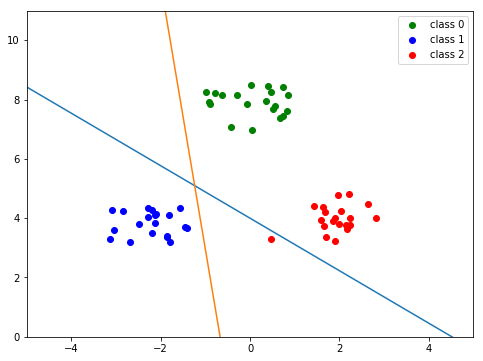

In [42]:
b_x = np.linspace(-5, 5, 100)
plt.figure(figsize=(8,6))

plt.plot(b_x, -b_x*p.weights[0][0]/p.weights[0][1]+4)
plt.plot(b_x, -b_x*p.weights[1][0]/p.weights[1][1]-6)

plt.scatter(class1[0], class1[1], label='class 0', c='g')
plt.scatter(class2[0], class2[1], label='class 1', c='b')
plt.scatter(class3[0], class3[1], label='class 2', c='r')

plt.xlim(-5, 5)
plt.ylim(0, 11)

plt.legend();

In [43]:
test = np.array([[-3, 3], [5, 2], [0, 10]])
p.predict(test)

array([1., 2., 0.])

In [44]:
np.all(p.predict(X) == y)

True